In [1]:
# Importation des modules

import pandas as pd
from gensim.models import Word2Vec
import random
import matplotlib.pyplot as plt
import numpy as np

#Affichage de toutes les colonnes

pd.set_option('display.max_columns', 500)

In [2]:
w2v_model_novice = Word2Vec.load("results/word2vec_novice_300.model")

w2v_model_exp = Word2Vec.load("results/word2vec_exp_300.model")

In [3]:
words_novice = list(w2v_model_novice.wv.vocab.keys())
words_exp = list(w2v_model_exp.wv.vocab.keys())

### Overlap et spread

In [27]:
def overlap(model1, model2, n , word):

    neighborhood_1 = set([i[0] for i in model1.wv.most_similar(positive=[word], topn = n)])
    neighborhood_2 = set([i[0] for i in model2.wv.most_similar(positive=[word], topn = n)])

    return len(neighborhood_1.intersection(neighborhood_2))

In [22]:
words_common = list(set(words_exp).intersection(set(words_novice)))
random.shuffle(words_common)

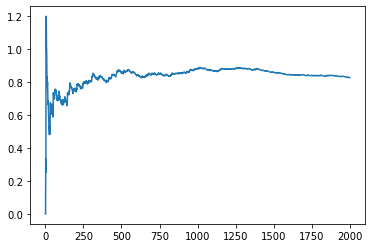

In [23]:
L_10 = [overlap(w2v_model_novice, w2v_model_exp, 10, word) for word in words_common[:2000]]
plt.plot([np.mean(L_10[:i]) for i in range(2000)])

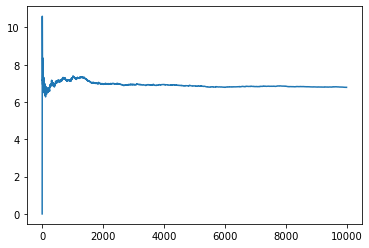

In [28]:
L_100 = [overlap(w2v_model_novice, w2v_model_exp, 100, word) for word in words_common[:10000]]
plt.plot([np.mean(L_100[:i]) for i in range(10000)])

/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


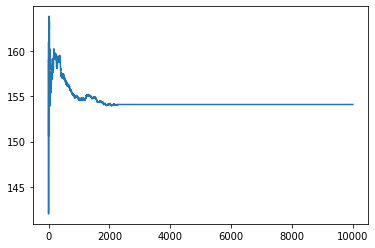

In [56]:
L_1000 = [overlap(w2v_model_novice, w2v_model_exp, 1000, word) for word in words_common[:10000]]
plt.plot([np.mean(L_1000[:i]) for i in range(10000)])

In [53]:
def rank(model, i, j):
    
    k = -1
    K = 10
    
    while k == -1 and 10 * K < len(words_exp):
        neighborhood = [i[0] for i in model.wv.most_similar(positive=[i], topn = K)]
        try:
            k = neighborhood.index(j)
        except:
            k = -1
        K *= 10
            
    return k + 1

def spread(model1, model2, n, word):

    neighborhood_1 = [i[0] for i in model1.wv.most_similar(positive=[word], topn = n)]
    ranks = [rank(model2, word, j) for j in neighborhood_1]
    return max(ranks)

In [54]:
#print(w2v_model_exp.wv.most_similar(positive=['droite'], topn = 10))
#rank(w2v_model_exp, 'droite', 'sarkozysme')

In [55]:
spread(w2v_model_novice, w2v_model_exp, 10, 'droite')

831

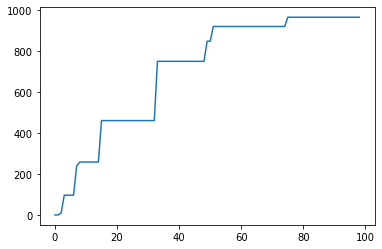

In [59]:
plt.plot([spread(w2v_model_novice, w2v_model_exp, i, 'demain') for i in range(1,100)])

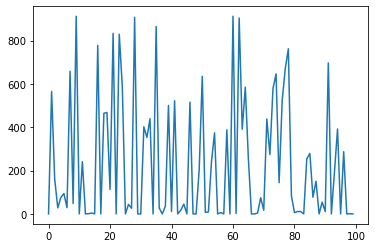

In [60]:
plt.plot([spread(w2v_model_novice, w2v_model_exp, 6, word) for word in words_common[:100]])

## WMD 

In [10]:
# Normalisation des vecteurs

w2v_model_exp.init_sims(replace = True)
w2v_model_novice.init_sims(replace = True)

2021-02-22 09:44:19,448 : INFO : precomputing L2-norms of word weight vectors
2021-02-22 09:44:19,600 : INFO : precomputing L2-norms of word weight vectors


In [19]:
df0 = pd.read_csv('data/data_cleaned_NLP.csv', sep = ',', encoding = 'latin-1')

In [23]:
df1 = df0[['Réplique', 'Groupe', 'tokenized_replique', 'Orateur']].copy()

df_novice = df1[df1['Groupe'] == 'Novice'].copy()
df_exp = df1[df1['Groupe'] == 'Exp'].copy()

In [58]:
df_novice = df_novice.dropna()

df_exp = df_exp.dropna()

2021-02-22 10:02:28,404 : INFO : NumExpr defaulting to 4 threads.


In [33]:
phrase0 = df_novice.iloc[0]['tokenized_replique'].split(' ')
phrase1 = df_novice.iloc[1]['tokenized_replique'].split(' ')
phrase2 = df_novice.iloc[2]['tokenized_replique'].split(' ')

### Calcul des distances intra

#### Novices

In [59]:
phrases = [df_novice.sample(frac=1).iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 2000)]

In [61]:
WMD_novices = [w2v_model_novice.wmdistance(phrases[i], phrases[i + 1]) for i in range(0, 4000, 2)]

<ipython-input-61-a58966109888>:1: DeprecationWarning: Call to deprecated `wmdistance` (Method will be removed in 4.0.0, use self.wv.wmdistance() instead).
  WMD_novices = [w2v_model_novice.wmdistance(phrases[i], phrases[i + 1]) for i in range(0, 4000, 2)]
2021-02-22 10:05:04,541 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:04,544 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:04,546 : INFO : built Dictionary(64 unique tokens: ['afin', 'apposer', 'article', 'autour', 'durant']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:04,576 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:04,578 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:04,579 : INFO : built Dictionary(31 unique tokens: ['agit', 'asile', 'bénéficier', 'comptent', 'demandent']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:05:04,590 : INFO : 

2021-02-22 10:05:05,463 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:05,464 : INFO : built Dictionary(52 unique tokens: ['asile', 'cette', 'ceux', 'commune', 'contre']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:05:05,470 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:05,472 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:05,473 : INFO : built Dictionary(52 unique tokens: ['abord', 'cent', 'collègue', 'dépakine', 'fois']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:05:05,510 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:05,513 : INFO : built Dictionary(38 unique tokens: ['chapeau', 'dire', 'entendu', 'fallait', 'faut']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:05:05,530 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:05,534 : INFO : adding docume

2021-02-22 10:05:06,202 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,203 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,205 : INFO : built Dictionary(36 unique tokens: ['accéder', 'aide', 'assistance', 'autonomes', 'autonomie']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:06,215 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,223 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,228 : INFO : built Dictionary(70 unique tokens: ['aucun', 'bancs', 'car', 'ciotti', 'commission']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:05:06,281 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,283 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,286 : INFO : built Dictionary(84 unique tokens: ['accompagne', 'application', 'assur

2021-02-22 10:05:06,828 : INFO : Removed 12 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,830 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,831 : INFO : built Dictionary(65 unique tokens: ['allez', 'alpes', 'article', 'blanc', 'bourguignon']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:05:06,864 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,866 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,868 : INFO : built Dictionary(62 unique tokens: ['a', 'comprise', 'personne', 'accroître', 'action']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:05:06,882 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:06,884 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:06,885 : INFO : built Dictionary(40 unique tokens: ['accompagnement', 'autonomie', 'bien'

2021-02-22 10:05:07,571 : INFO : built Dictionary(27 unique tokens: ['avancées', 'car', 'cette', 'constate', 'doit']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:05:07,576 : INFO : Removed 7 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:07,577 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:07,579 : INFO : built Dictionary(81 unique tokens: ['albert', 'année', 'après', 'aussi', 'bien']...) from 2 documents (total 83 corpus positions)
2021-02-22 10:05:07,636 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:07,638 : INFO : built Dictionary(24 unique tokens: ['cadre', 'coopération', 'décentralisée', 'faut', 'fonction']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:05:07,644 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:07,645 : INFO : built Dictionary(22 unique tokens: ['amendements', 'demande', 'donc', 'députés', 'messieurs']...) fro

2021-02-22 10:05:08,158 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:08,160 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:08,163 : INFO : built Dictionary(70 unique tokens: ['acteurs', 'affectent', 'assuré', 'battent', 'bien']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:05:08,222 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:08,224 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:08,225 : INFO : built Dictionary(15 unique tokens: ['affaires', 'agir', 'cette', 'commission', 'devons']...) from 2 documents (total 15 corpus positions)
2021-02-22 10:05:08,227 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:08,228 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:08,231 : INFO : built Dictionary(70 unique tokens: ['abusif', 'accompagnement', 'accès', 

2021-02-22 10:05:09,080 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:09,081 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:09,084 : INFO : built Dictionary(41 unique tokens: ['afin', 'avant', 'bien', 'celles', 'comme']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:09,098 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:09,100 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:09,102 : INFO : built Dictionary(64 unique tokens: ['ans', 'après', 'avoir', 'cela', 'cent']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:09,142 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:09,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:09,145 : INFO : built Dictionary(46 unique tokens: ['amis', 'brève', 'calmes', 'chers', 'collègues']...) from 

2021-02-22 10:05:09,903 : INFO : built Dictionary(51 unique tokens: ['apprentissage', 'article', 'contribution', 'défavorable', 'entreprises']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:05:09,925 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:09,927 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:09,929 : INFO : built Dictionary(35 unique tokens: ['amendement', 'assemblée', 'bonne', 'cette', 'constitution']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:09,945 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:09,946 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:09,947 : INFO : built Dictionary(57 unique tokens: ['accueillir', 'apporter', 'arrivent', 'auquel', 'cela']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:05:09,991 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respe

2021-02-22 10:05:10,626 : INFO : built Dictionary(20 unique tokens: ['madame', 'oui', 'présidente', 'adp', 'ailleurs']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:05:10,630 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:10,632 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:10,637 : INFO : built Dictionary(25 unique tokens: ['alors', 'chiffres', 'efficace', 'faire', 'faits']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:05:10,649 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:10,653 : INFO : built Dictionary(17 unique tokens: ['défavorable', 'rapporteur', 'chacun', 'chaque', 'discours']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:05:10,658 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:10,660 : INFO : built Dictionary(37 unique tokens: ['a', 'alors', 'applicable', 'argument', 'avant']...) from

2021-02-22 10:05:11,326 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:11,329 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:11,331 : INFO : built Dictionary(56 unique tokens: ['assemblée', 'beaucoup', 'celle', 'cohérents', 'enceinte']...) from 2 documents (total 69 corpus positions)
2021-02-22 10:05:11,358 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:11,361 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:11,363 : INFO : built Dictionary(77 unique tokens: ['a', 'calcul', 'concernant', 'directive', 'disposition']...) from 2 documents (total 86 corpus positions)
2021-02-22 10:05:11,416 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:11,417 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:11,418 : INFO : built Dictionary(56 unique tokens: ['amendement', 'cet', 'commu

2021-02-22 10:05:12,103 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:12,104 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,106 : INFO : built Dictionary(43 unique tokens: ['cette', 'comptes', 'cour', 'coût', 'cruciales']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:05:12,125 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:12,127 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,129 : INFO : built Dictionary(65 unique tokens: ['assumons', 'aussi', 'celui', 'choix', 'compare']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:05:12,180 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,181 : INFO : built Dictionary(31 unique tokens: ['faites', 'menez', 'politique', 'promotion', 'attendre']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:05:12,193 : INFO : Re

2021-02-22 10:05:12,904 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:12,905 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,906 : INFO : built Dictionary(25 unique tokens: ['amendement', 'avis', 'cadre', 'car', 'cesp']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:05:12,913 : INFO : Removed 0 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:12,914 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,915 : INFO : built Dictionary(29 unique tokens: ['alinéa', 'article', 'fondement', 'monsieur', 'oui']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:05:12,921 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:12,922 : INFO : built Dictionary(18 unique tokens: ['accès', 'amendement', 'avis', 'doit', 'défavorable']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:05:12,928 : INFO : addin

2021-02-22 10:05:13,508 : INFO : built Dictionary(57 unique tokens: ['appelons', 'bien', 'encourager', 'entend', 'figaro']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:05:13,538 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:13,539 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:13,540 : INFO : built Dictionary(41 unique tokens: ['a', 'affirmer', 'attachée', 'aucuns', 'autant']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:05:13,558 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:13,560 : INFO : built Dictionary(25 unique tokens: ['année', 'blanche', 'entreprises', 'fiscale', 'fonds']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:05:13,574 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:13,577 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:13,579 : INFO : 

2021-02-22 10:05:14,327 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:14,329 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:14,330 : INFO : built Dictionary(90 unique tokens: ['a', 'absence', 'afin', 'agents', 'alors']...) from 2 documents (total 105 corpus positions)
2021-02-22 10:05:14,413 : INFO : Removed 1 and 12 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:14,414 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:14,415 : INFO : built Dictionary(68 unique tokens: ['appliquées', 'car', 'cause', 'celle', 'ci']...) from 2 documents (total 74 corpus positions)
2021-02-22 10:05:14,455 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:14,456 : INFO : built Dictionary(6 unique tokens: ['a', 'actifs', 'associés', 'combien', 'déception']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:05:14,458 : INFO : adding document #0 

2021-02-22 10:05:15,017 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,020 : INFO : built Dictionary(38 unique tokens: ['aller', 'annexe', 'ans', 'applaudissements', 'auditionné']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:05:15,028 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:15,031 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,033 : INFO : built Dictionary(52 unique tokens: ['afin', 'apparentés', 'associatif', 'axes', 'bien']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:05:15,055 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,056 : INFO : built Dictionary(61 unique tokens: ['années', 'ans', 'aussi', 'cadre', 'cinq']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:05:15,089 : INFO : Removed 4 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:15,091 : INFO : add

2021-02-22 10:05:15,706 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:15,707 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,708 : INFO : built Dictionary(12 unique tokens: ['assis', 'contrat', 'dessus', 'fait', 'france']...) from 2 documents (total 12 corpus positions)
2021-02-22 10:05:15,712 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:15,713 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,716 : INFO : built Dictionary(26 unique tokens: ['agir', 'application', 'aussi', 'avant', 'cette']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:05:15,727 : INFO : Removed 10 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:15,729 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:15,732 : INFO : built Dictionary(66 unique tokens: ['accès', 'alpes', 'ap', 'assistance', 'assur

2021-02-22 10:05:16,487 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:16,490 : INFO : built Dictionary(35 unique tokens: ['adopté', 'apparente', 'assignation', 'certaines', 'dispose']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:05:16,498 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:16,503 : INFO : built Dictionary(49 unique tokens: ['améliorer', 'carrière', 'commencé', 'droits', 'durée']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:05:16,525 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:16,526 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:16,527 : INFO : built Dictionary(62 unique tokens: ['actives', 'aides', 'ans', 'armentières', 'beaucoup']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:05:16,576 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:16

2021-02-22 10:05:17,164 : INFO : built Dictionary(38 unique tokens: ['a', 'budget', 'répondu', 'accès', 'actions']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:17,171 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:17,173 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:17,174 : INFO : built Dictionary(25 unique tokens: ['ambiguïté', 'avis', 'changer', 'compréhension', 'faire']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:05:17,187 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:17,189 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:17,192 : INFO : built Dictionary(75 unique tokens: ['accès', 'ainsi', 'certaine', 'chère', 'collègue']...) from 2 documents (total 84 corpus positions)
2021-02-22 10:05:17,250 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:17,253 : 

2021-02-22 10:05:17,764 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:17,767 : INFO : built Dictionary(43 unique tokens: ['arbitrage', 'avis', 'bien', 'branche', 'cela']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:17,779 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:17,780 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:17,782 : INFO : built Dictionary(66 unique tokens: ['biens', 'nécessité', 'parlons', 'première', 'tout']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:05:17,800 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:17,802 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:17,805 : INFO : built Dictionary(39 unique tokens: ['accord', 'comprendre', 'inquiétude', 'peux', 'si']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:17,816 : INFO : addin

2021-02-22 10:05:18,443 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:18,444 : INFO : built Dictionary(67 unique tokens: ['aberration', 'ailleurs', 'aller', 'alors', 'aussi']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:05:18,487 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:18,488 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:18,490 : INFO : built Dictionary(90 unique tokens: ['agricole', 'agricoles', 'agriculteurs', 'agriculture', 'alors']...) from 2 documents (total 97 corpus positions)
2021-02-22 10:05:18,556 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:18,557 : INFO : built Dictionary(17 unique tokens: ['approuvée', 'cette', 'estimation', 'experts', 'inserm']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:05:18,560 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:18,561 : 

2021-02-22 10:05:19,224 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,227 : INFO : built Dictionary(77 unique tokens: ['a', 'argument', 'arrêt', 'aucun', 'autre']...) from 2 documents (total 103 corpus positions)
2021-02-22 10:05:19,240 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:19,242 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,243 : INFO : built Dictionary(23 unique tokens: ['a', 'alors', 'cohérente', 'dès', 'démarche']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:05:19,250 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:19,262 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,264 : INFO : built Dictionary(40 unique tokens: ['ailleurs', 'aom', 'apparaît', 'développement', 'intérêt']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:05:19,289 : INFO : Removed 

2021-02-22 10:05:19,909 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,911 : INFO : built Dictionary(35 unique tokens: ['bien', 'cas', 'comme', 'cours', 'devant']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:05:19,925 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,927 : INFO : built Dictionary(46 unique tokens: ['amendement', 'clarification', 'compte', 'conséquence', 'dispositif']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:05:19,953 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:19,957 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:19,959 : INFO : built Dictionary(56 unique tokens: ['ainsi', 'appartenant', 'commission', 'commissions', 'composée']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:05:19,996 : INFO : Removed 12 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 1

2021-02-22 10:05:20,976 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:20,977 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:20,978 : INFO : built Dictionary(37 unique tokens: ['autant', 'moins', 'précis', 'réjouir', 'secrétaire']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:05:20,990 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:20,991 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:20,993 : INFO : built Dictionary(34 unique tokens: ['amendement', 'actes', 'agissements', 'alors', 'améliorer']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:05:20,999 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:21,000 : INFO : built Dictionary(37 unique tokens: ['air', 'allons', 'angoisse', 'encore', 'enfants']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:05:21,015 : I

2021-02-22 10:05:21,912 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:21,914 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:21,916 : INFO : built Dictionary(43 unique tokens: ['concernant', 'européennes', 'importations', 'règles', 'afin']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:21,924 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:21,926 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:21,928 : INFO : built Dictionary(56 unique tokens: ['information', 'instaure', 'obligation', 'porte', 'toutefois']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:05:21,947 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:21,949 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:21,966 : INFO : built Dictionary(76 unique tokens: ['a', 'abord', 'ac

2021-02-22 10:05:23,147 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:23,153 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:23,155 : INFO : built Dictionary(36 unique tokens: ['rien', 'voir', 'ainsi', 'bonnes', 'bénéficier']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:05:23,161 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:23,162 : INFO : built Dictionary(30 unique tokens: ['quelle', 'surprise', 'a', 'acceptée', 'amiable']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:05:23,165 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:23,169 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:23,171 : INFO : built Dictionary(15 unique tokens: ['français', 'lieu', 'premier', 'souhaitent', 'transition']...) from 2 documents (total 15 corpus positions)
2021-02-22 10:05:23,175 : INFO : 

2021-02-22 10:05:24,055 : INFO : Removed 3 and 7 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:24,056 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:24,058 : INFO : built Dictionary(122 unique tokens: ['a', 'abord', 'action', 'affaires', 'animation']...) from 2 documents (total 135 corpus positions)
2021-02-22 10:05:24,232 : INFO : Removed 0 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:24,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:24,234 : INFO : built Dictionary(35 unique tokens: ['bien', 'très', 'afin', 'cet', 'demain']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:24,240 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:24,245 : INFO : built Dictionary(18 unique tokens: ['amendement', 'aveugle', 'cet', 'démarchage', 'interdit']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:05:24,255 : INFO : adding d

2021-02-22 10:05:25,151 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,153 : INFO : built Dictionary(34 unique tokens: ['amendement', 'concertation', 'faire', 'idée', 'installer']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:05:25,173 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:25,174 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,176 : INFO : built Dictionary(70 unique tokens: ['a', 'agit', 'allons', 'auquel', 'clairement']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:05:25,240 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:25,241 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,242 : INFO : built Dictionary(73 unique tokens: ['agir', 'anti', 'assemblée', 'assure', 'autres']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:05:25,317 : INFO : ad

2021-02-22 10:05:25,874 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,875 : INFO : built Dictionary(27 unique tokens: ['affaires', 'bien', 'commission', 'culturelles', 'président']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:05:25,881 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,882 : INFO : built Dictionary(37 unique tokens: ['a', 'ailleurs', 'discussion', 'donc', 'droit']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:25,893 : INFO : Removed 6 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:25,894 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,895 : INFO : built Dictionary(58 unique tokens: ['a', 'allemand', 'allemande', 'années', 'aucun']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:05:25,912 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:25,914 : INFO : built Dic

2021-02-22 10:05:26,830 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:26,834 : INFO : built Dictionary(18 unique tokens: ['amendement', 'avis', 'cet', 'donc', 'défaut']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:05:26,847 : INFO : Removed 0 and 9 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:26,849 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:26,852 : INFO : built Dictionary(91 unique tokens: ['accompagner', 'agit', 'considérons', 'crois', 'mesures']...) from 2 documents (total 96 corpus positions)
2021-02-22 10:05:26,910 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:26,912 : INFO : built Dictionary(11 unique tokens: ['amendement', 'avant', 'exactement', 'façon', 'france']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:05:26,923 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:26,925 : INFO

2021-02-22 10:05:27,669 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:27,670 : INFO : built Dictionary(97 unique tokens: ['a', 'abonnements', 'activité', 'afin', 'agglomérations']...) from 2 documents (total 114 corpus positions)
2021-02-22 10:05:27,739 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:27,740 : INFO : built Dictionary(63 unique tokens: ['accélérer', 'afin', 'apposer', 'biodiversité', 'bouteilles']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:05:27,769 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:27,770 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:27,771 : INFO : built Dictionary(52 unique tokens: ['a', 'académie', 'ainsi', 'appliquer', 'carte']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:05:27,809 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:27,81

2021-02-22 10:05:28,500 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:28,502 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:28,503 : INFO : built Dictionary(26 unique tokens: ['accord', 'appliqueront', 'aussi', 'avancée', 'cet']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:05:28,514 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:28,516 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:28,518 : INFO : built Dictionary(66 unique tokens: ['a', 'arrêtons', 'autorisée', 'avoir', 'conventions']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:05:28,566 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:28,570 : INFO : built Dictionary(20 unique tokens: ['amendements', 'dispositif', 'font', 'partie', 'trois']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:05:28,577 : IN

2021-02-22 10:05:29,246 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:29,248 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:29,250 : INFO : built Dictionary(33 unique tokens: ['tout', 'administration', 'amélioration', 'appels', 'article']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:29,258 : INFO : Removed 0 and 8 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:29,259 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:29,260 : INFO : built Dictionary(103 unique tokens: ['certification', 'citer', 'commerciale', 'crée', 'créer']...) from 2 documents (total 131 corpus positions)
2021-02-22 10:05:29,362 : INFO : Removed 10 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:29,363 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:29,364 : INFO : built Dictionary(67 unique tokens: ['a', 'actions', 'ai

2021-02-22 10:05:30,195 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:30,197 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:30,198 : INFO : built Dictionary(52 unique tokens: ['attendre', 'bonne', 'chacun', 'commission', 'concours']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:05:30,227 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:30,229 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:30,230 : INFO : built Dictionary(37 unique tokens: ['abordons', 'action', 'affaires', 'ailleurs', 'amendement']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:05:30,251 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:30,253 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:30,254 : INFO : built Dictionary(72 unique tokens: ['a', 'accepté', 'affaires'

2021-02-22 10:05:31,138 : INFO : built Dictionary(31 unique tokens: ['européen', 'façon', 'parlement', 'rapporteur', 'toute']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:05:31,152 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:31,154 : INFO : built Dictionary(19 unique tokens: ['ainsi', 'ans', 'cliniques', 'comme', 'depuis']...) from 2 documents (total 19 corpus positions)
2021-02-22 10:05:31,159 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:31,161 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:31,162 : INFO : built Dictionary(37 unique tokens: ['aucunement', 'car', 'cette', 'conforter', 'contraire']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:31,179 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:31,181 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:31,182 : INFO

2021-02-22 10:05:31,952 : INFO : built Dictionary(51 unique tokens: ['accélération', 'amendements', 'années', 'ans', 'apprentissage']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:05:31,980 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:31,982 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:31,988 : INFO : built Dictionary(51 unique tokens: ['commission', 'eh', 'fallait', 'oui', 'public']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:05:32,013 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:32,022 : INFO : built Dictionary(5 unique tokens: ['oublier', 'près', 'mots', 'payer', 'ça']) from 2 documents (total 5 corpus positions)
2021-02-22 10:05:32,029 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:32,037 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:32,041 : INFO : built Di

2021-02-22 10:05:32,892 : INFO : built Dictionary(20 unique tokens: ['dispositifs', 'donner', 'détail', 'pouvez', 'ambition']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:05:32,896 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:32,899 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:32,900 : INFO : built Dictionary(66 unique tokens: ['actuellement', 'agricole', 'agriculture', 'alimentation', 'avenir']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:32,950 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:32,951 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:32,952 : INFO : built Dictionary(41 unique tokens: ['cette', 'comment', 'depuis', 'expliquez', 'hui']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:05:32,971 : INFO : Removed 5 and 6 OOV words from document 1 and 2 (respectively).
2021-

2021-02-22 10:05:33,693 : INFO : Removed 6 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:33,694 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:33,695 : INFO : built Dictionary(101 unique tokens: ['a', 'accepte', 'accord', 'accordé', 'acte']...) from 2 documents (total 135 corpus positions)
2021-02-22 10:05:33,779 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:33,780 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:33,781 : INFO : built Dictionary(75 unique tokens: ['certains', 'cette', 'commission', 'continuerons', 'dispositions']...) from 2 documents (total 79 corpus positions)
2021-02-22 10:05:33,830 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:33,831 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:33,832 : INFO : built Dictionary(13 unique tokens: ['a', 'amendement', 'avis', 'c

2021-02-22 10:05:34,314 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:34,316 : INFO : built Dictionary(18 unique tokens: ['agissements', 'condamnez', 'fermement', 'assez', 'cela']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:05:34,321 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:34,323 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:34,325 : INFO : built Dictionary(27 unique tokens: ['a', 'abord', 'accorder', 'ceux', 'concernent']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:05:34,337 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:34,339 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:34,341 : INFO : built Dictionary(57 unique tokens: ['agents', 'déjà', 'fonction', 'primes', 'publique']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:05:34,362 : INFO : 

2021-02-22 10:05:35,363 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:35,364 : INFO : built Dictionary(58 unique tokens: ['a', 'accès', 'assemblée', 'cette', 'concernés']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:05:35,407 : INFO : Removed 4 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:35,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:35,411 : INFO : built Dictionary(54 unique tokens: ['acheté', 'ans', 'argent', 'aussi', 'aéroport']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:05:35,445 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:35,447 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:35,449 : INFO : built Dictionary(51 unique tokens: ['apparaît', 'canada', 'caricatures', 'celui', 'certains']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:05:35,477 : INFO : Rem

2021-02-22 10:05:36,140 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:36,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,144 : INFO : built Dictionary(68 unique tokens: ['bien', 'crois', 'dynamique', 'objectif', 'satisfaisante']...) from 2 documents (total 69 corpus positions)
2021-02-22 10:05:36,172 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,176 : INFO : built Dictionary(46 unique tokens: ['bravo', 'commission', 'mixte', 'paritaire', 'président']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:05:36,195 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,197 : INFO : built Dictionary(43 unique tokens: ['accès', 'beaucoup', 'condition', 'cpf', 'essentiel']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:05:36,224 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:36,

2021-02-22 10:05:36,876 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,878 : INFO : built Dictionary(37 unique tokens: ['artifices', 'assurer', 'budget', 'celui', 'critiquez']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:05:36,894 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:36,896 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,897 : INFO : built Dictionary(26 unique tokens: ['a', 'avancer', 'canada', 'choses', 'connais']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:05:36,905 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:36,907 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:36,909 : INFO : built Dictionary(55 unique tokens: ['autonomie', 'chers', 'civile', 'collègues', 'confinement']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:05:36,949 : IN

2021-02-22 10:05:37,518 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:37,525 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:37,530 : INFO : built Dictionary(30 unique tokens: ['affirmer', 'apprentissage', 'attachée', 'auquel', 'chômage']...) from 2 documents (total 35 corpus positions)
2021-02-22 10:05:37,545 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:37,548 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:37,549 : INFO : built Dictionary(40 unique tokens: ['auprès', 'celle', 'centralisée', 'chez', 'ci']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:37,566 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:37,571 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:37,573 : INFO : built Dictionary(60 unique tokens: ['adapte', 'chacune', 'commissions

2021-02-22 10:05:38,237 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:38,239 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,240 : INFO : built Dictionary(8 unique tokens: ['argumentaire', 'avis', 'demande', 'défavorable', 'produits']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:05:38,244 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:38,246 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,247 : INFO : built Dictionary(40 unique tokens: ['amendement', 'analyse', 'applicable', 'avis', 'cnil']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:38,272 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:38,273 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,275 : INFO : built Dictionary(62 unique tokens: ['abandonnés', 'afin', 'alle

2021-02-22 10:05:38,918 : INFO : built Dictionary(57 unique tokens: ['a', 'accordant', 'accès', 'anciens', 'argent']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:05:38,930 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:38,934 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,936 : INFO : built Dictionary(40 unique tokens: ['chance', 'donné', 'importe', 'moment', 'peu']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:05:38,948 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,950 : INFO : built Dictionary(44 unique tokens: ['code', 'dispense', 'dispose', 'emporte', 'exécuter']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:38,970 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:38,972 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:38,973 : INFO : built Dic

2021-02-22 10:05:39,811 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:39,812 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:39,816 : INFO : built Dictionary(27 unique tokens: ['cette', 'compliquée', 'comptabilité', 'contribution', 'derrière']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:05:39,828 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:39,829 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:39,830 : INFO : built Dictionary(43 unique tokens: ['amendement', 'apprentissage', 'car', 'cet', 'cette']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:05:39,854 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:39,855 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:39,858 : INFO : built Dictionary(82 unique tokens: ['accompagner', 'accélé

2021-02-22 10:05:40,653 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:40,655 : INFO : built Dictionary(39 unique tokens: ['amendement', 'aérien', 'celui', 'cet', 'cette']...) from 2 documents (total 39 corpus positions)
2021-02-22 10:05:40,669 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:40,670 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:40,672 : INFO : built Dictionary(28 unique tokens: ['afin', 'assumés', 'chacun', 'choisir', 'choix']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:05:40,682 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:40,684 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:40,686 : INFO : built Dictionary(41 unique tokens: ['amendement', 'deux', 'différence', 'dépasser', 'entre']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:40,704 : INFO : add

2021-02-22 10:05:41,472 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:41,473 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:41,475 : INFO : built Dictionary(44 unique tokens: ['analyse', 'avis', 'partage', 'rapporteur', 'secrétaire']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:41,483 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:41,485 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:41,486 : INFO : built Dictionary(43 unique tokens: ['avis', 'défavorable', 'secrétaire', 'état', 'accès']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:05:41,499 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:41,501 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:41,503 : INFO : built Dictionary(33 unique tokens: ['agit', 'bien', 'citoyens', 'co

2021-02-22 10:05:42,123 : INFO : built Dictionary(47 unique tokens: ['amendement', 'appliquent', 'article', 'aussi', 'blocage']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:05:42,142 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:42,143 : INFO : built Dictionary(17 unique tokens: ['amendement', 'aussi', 'certes', 'contre', 'davantage']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:05:42,147 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:42,152 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:42,155 : INFO : built Dictionary(85 unique tokens: ['actuellement', 'affectés', 'afin', 'dernière', 'disposer']...) from 2 documents (total 97 corpus positions)
2021-02-22 10:05:42,224 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:42,225 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05

2021-02-22 10:05:43,011 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,012 : INFO : built Dictionary(42 unique tokens: ['alinéa', 'attaque', 'donner', 'ligne', 'sans']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:05:43,035 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,036 : INFO : built Dictionary(19 unique tokens: ['an', 'général', 'rapporteur', 'assia', 'beaucoup']...) from 2 documents (total 21 corpus positions)
2021-02-22 10:05:43,045 : INFO : Removed 4 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:43,047 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,048 : INFO : built Dictionary(102 unique tokens: ['a', 'aborde', 'accrue', 'aide', 'alors']...) from 2 documents (total 123 corpus positions)
2021-02-22 10:05:43,076 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:43,077 : INFO : adding documen

2021-02-22 10:05:43,864 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:43,865 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,869 : INFO : built Dictionary(51 unique tokens: ['a', 'actuelle', 'ampleur', 'aussi', 'autorisation']...) from 2 documents (total 59 corpus positions)
2021-02-22 10:05:43,898 : INFO : Removed 5 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:43,903 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,905 : INFO : built Dictionary(57 unique tokens: ['a', 'amendement', 'an', 'arrêts', 'aussi']...) from 2 documents (total 70 corpus positions)
2021-02-22 10:05:43,959 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:43,960 : INFO : built Dictionary(13 unique tokens: ['budgétaire', 'cause', 'haut', 'institutionnelle', 'maltraitance']...) from 2 documents (total 16 corpus positions)
2021-02-22 10:05:43,974 : I

2021-02-22 10:05:44,900 : INFO : built Dictionary(50 unique tokens: ['afférents', 'amélioration', 'appelle', 'apportent', 'assistants']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:05:44,931 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:44,933 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:44,939 : INFO : built Dictionary(47 unique tokens: ['a', 'choix', 'enfants', 'enseignement', 'fait']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:05:44,959 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:44,963 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:44,969 : INFO : built Dictionary(35 unique tokens: ['a', 'apporter', 'auprès', 'comprends', 'derniers']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:05:44,974 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10

2021-02-22 10:05:45,733 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:45,734 : INFO : built Dictionary(62 unique tokens: ['a', 'abaissement', 'ans', 'avant', 'cette']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:45,805 : INFO : Removed 6 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:45,810 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:45,811 : INFO : built Dictionary(78 unique tokens: ['a', 'ainsi', 'après', 'bénéficier', 'cadre']...) from 2 documents (total 86 corpus positions)
2021-02-22 10:05:45,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:45,870 : INFO : built Dictionary(46 unique tokens: ['absents', 'alors', 'ans', 'apparaît', 'assurer']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:05:45,884 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:45,885 : INFO : adding document #

2021-02-22 10:05:46,827 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:46,829 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:46,830 : INFO : built Dictionary(60 unique tokens: ['a', 'accordent', 'adoption', 'article', 'celui']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:46,875 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:46,876 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:46,878 : INFO : built Dictionary(47 unique tokens: ['accuser', 'amendement', 'cependant', 'cet', 'donc']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:05:46,899 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:46,901 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:46,904 : INFO : built Dictionary(25 unique tokens: ['avis', 'convergence', 'prônez', 'rappor

2021-02-22 10:05:47,734 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:47,737 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:47,740 : INFO : built Dictionary(100 unique tokens: ['a', 'aidés', 'ainsi', 'année', 'associations']...) from 2 documents (total 115 corpus positions)
2021-02-22 10:05:47,884 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:47,886 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:47,887 : INFO : built Dictionary(42 unique tokens: ['actions', 'article', 'choses', 'dire', 'essayer']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:47,906 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:47,909 : INFO : built Dictionary(47 unique tokens: ['adopté', 'amendement', 'ans', 'certainement', 'certains']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:05:47,965 : INFO 

2021-02-22 10:05:48,796 : INFO : built Dictionary(60 unique tokens: ['aignan', 'celui', 'devise', 'dupont', 'députés']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:05:48,826 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:48,827 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:48,829 : INFO : built Dictionary(24 unique tokens: ['ailleurs', 'article', 'b', 'bis', 'commission']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:05:48,851 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:48,853 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:48,856 : INFO : built Dictionary(38 unique tokens: ['abeilles', 'action', 'apiculteurs', 'attendent', 'bien']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:05:48,887 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:48,893 

2021-02-22 10:05:49,872 : INFO : built Dictionary(64 unique tokens: ['afin', 'agence', 'bonnes', 'car', 'celle']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:05:49,908 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:49,910 : INFO : built Dictionary(41 unique tokens: ['administration', 'avis', 'budgétaire', 'commission', 'constitutionnelles']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:05:49,926 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:49,927 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:49,928 : INFO : built Dictionary(90 unique tokens: ['a', 'allégement', 'appel', 'aubaine', 'budgétés']...) from 2 documents (total 96 corpus positions)
2021-02-22 10:05:50,050 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:50,053 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:50,

2021-02-22 10:05:50,880 : INFO : built Dictionary(44 unique tokens: ['a', 'accord', 'approuvé', 'constitue', 'contre']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:05:50,902 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:50,903 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:50,904 : INFO : built Dictionary(104 unique tokens: ['a', 'antérieure', 'application', 'appliquer', 'appliquera']...) from 2 documents (total 123 corpus positions)
2021-02-22 10:05:51,018 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:51,019 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:51,020 : INFO : built Dictionary(53 unique tokens: ['agit', 'ame', 'budgétaire', 'destinataire', 'dont']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:05:51,051 : INFO : Removed 0 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:0

2021-02-22 10:05:52,019 : INFO : built Dictionary(21 unique tokens: ['alinéa', 'amendements', 'avoir', 'car', 'confirme']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:05:52,027 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:52,030 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,032 : INFO : built Dictionary(24 unique tokens: ['aimerais', 'appeler', 'attention', 'autres', 'bonne']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:05:52,040 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:52,041 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,042 : INFO : built Dictionary(35 unique tokens: ['générique', 'monsieur', 'oui', 'peuple', 'point']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:05:52,053 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,055 : INFO :

2021-02-22 10:05:52,773 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:52,774 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,776 : INFO : built Dictionary(69 unique tokens: ['actions', 'afin', 'charge', 'collectivement', 'concerne']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:05:52,833 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:52,834 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,835 : INFO : built Dictionary(71 unique tokens: ['activité', 'ancrer', 'apprenons', 'auditions', 'autre']...) from 2 documents (total 79 corpus positions)
2021-02-22 10:05:52,884 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:52,885 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:52,886 : INFO : built Dictionary(43 unique tokens: ['bloc', 'communauté', 'comm

2021-02-22 10:05:53,490 : INFO : built Dictionary(70 unique tokens: ['accès', 'agit', 'agression', 'après', 'cela']...) from 2 documents (total 83 corpus positions)
2021-02-22 10:05:53,549 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:53,550 : INFO : built Dictionary(31 unique tokens: ['appliquent', 'commission', 'lois', 'rappelé', 'règles']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:05:53,556 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:53,558 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:53,560 : INFO : built Dictionary(55 unique tokens: ['argumenté', 'cette', 'date', 'débat', 'débattu']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:05:53,590 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:53,591 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:53,592 : INFO : buil

2021-02-22 10:05:54,283 : INFO : built Dictionary(60 unique tokens: ['adapté', 'ampleur', 'argument', 'cadre', 'chère']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:05:54,320 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:54,322 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,324 : INFO : built Dictionary(53 unique tokens: ['a', 'agricoles', 'agriculteurs', 'ailleurs', 'aspa']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:05:54,335 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:54,338 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,339 : INFO : built Dictionary(42 unique tokens: ['allez', 'beaucoup', 'envie', 'français', 'partiront']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:05:54,359 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,361 : INFO 

2021-02-22 10:05:54,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,853 : INFO : built Dictionary(20 unique tokens: ['agissant', 'chiffres', 'cordier', 'fur', 'groupe']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:05:54,861 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,863 : INFO : built Dictionary(30 unique tokens: ['amendements', 'autre', 'avis', 'deux', 'donc']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:05:54,873 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:54,875 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:54,880 : INFO : built Dictionary(60 unique tokens: ['actes', 'avis', 'avoir', 'cardiologie', 'cas']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:05:54,923 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:54,925 : INFO : adding doc

2021-02-22 10:05:55,640 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:55,642 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:55,643 : INFO : built Dictionary(28 unique tokens: ['amendement', 'accès', 'apparemment', 'bas', 'cas']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:05:55,648 : INFO : Removed 0 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:55,653 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:55,655 : INFO : built Dictionary(53 unique tokens: ['affaires', 'bien', 'commission', 'président', 'très']...) from 2 documents (total 59 corpus positions)
2021-02-22 10:05:55,671 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:55,672 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:55,673 : INFO : built Dictionary(78 unique tokens: ['amendement', 'avoir', 'cet', 'class

2021-02-22 10:05:56,633 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:56,635 : INFO : built Dictionary(27 unique tokens: ['a', 'agit', 'autorisations', 'bien', 'budget']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:05:56,645 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:56,646 : INFO : built Dictionary(55 unique tokens: ['adoptée', 'affichés', 'afin', 'appréciation', 'budgétaire']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:05:56,673 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:56,674 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:56,675 : INFO : built Dictionary(46 unique tokens: ['alors', 'amendement', 'appliquées', 'aucun', 'bon']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:05:56,695 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:56,697 : INFO : built 

2021-02-22 10:05:57,453 : INFO : built Dictionary(19 unique tokens: ['cela', 'cette', 'fait', 'fois', 'général']...) from 2 documents (total 19 corpus positions)
2021-02-22 10:05:57,458 : INFO : Removed 1 and 8 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:57,459 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:57,461 : INFO : built Dictionary(70 unique tokens: ['afin', 'agir', 'ainsi', 'cadre', 'cesser']...) from 2 documents (total 88 corpus positions)
2021-02-22 10:05:57,508 : INFO : Removed 1 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:57,510 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:57,511 : INFO : built Dictionary(56 unique tokens: ['battons', 'chers', 'hui', 'jeunes', 'reproduise']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:05:57,534 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:57,537 : INFO : built Dictionary(29

2021-02-22 10:05:58,456 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:58,458 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:58,459 : INFO : built Dictionary(111 unique tokens: ['ajustements', 'ampleur', 'année', 'apparaît', 'approbation']...) from 2 documents (total 123 corpus positions)
2021-02-22 10:05:58,617 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:58,618 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:58,619 : INFO : built Dictionary(72 unique tokens: ['a', 'accéder', 'alinéa', 'article', 'bénéfice']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:05:58,665 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:58,666 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:58,667 : INFO : built Dictionary(53 unique tokens: ['amendements', 'article', 'bie

2021-02-22 10:05:59,290 : INFO : Removed 5 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:59,291 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:59,294 : INFO : built Dictionary(86 unique tokens: ['a', 'afin', 'amendement', 'avoir', 'caisses']...) from 2 documents (total 92 corpus positions)
2021-02-22 10:05:59,424 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:05:59,425 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:59,427 : INFO : built Dictionary(26 unique tokens: ['amendement', 'cet', 'chers', 'collègues', 'devons']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:05:59,445 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:05:59,447 : INFO : built Dictionary(33 unique tokens: ['alors', 'amendement', 'besoin', 'certains', 'cet']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:05:59,459 : INFO : adding

2021-02-22 10:06:00,327 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:00,330 : INFO : built Dictionary(61 unique tokens: ['aussi', 'chef', 'compétence', 'droit', 'décisions']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:06:00,362 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:00,363 : INFO : built Dictionary(38 unique tokens: ['a', 'cela', 'contesté', 'côtés', 'députés']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:06:00,379 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:00,380 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:00,382 : INFO : built Dictionary(26 unique tokens: ['agit', 'amendement', 'bien', 'compris', 'convaincre']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:06:00,389 : INFO : Removed 13 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:00,390 : INFO : addi

2021-02-22 10:06:01,121 : INFO : built Dictionary(6 unique tokens: ['aussi', 'menaces', 'mort', 'reçois', 'rapporteure']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:06:01,123 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,125 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:01,126 : INFO : built Dictionary(42 unique tokens: ['application', 'aspects', 'avis', 'compte', 'défavorable']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:06:01,146 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,147 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:01,148 : INFO : built Dictionary(57 unique tokens: ['amendements', 'cela', 'contre', 'dit', 'voterai']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:06:01,166 : INFO : Removed 4 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,

2021-02-22 10:06:01,812 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,813 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:01,814 : INFO : built Dictionary(64 unique tokens: ['a', 'bancs', 'bonnes', 'certains', 'collègues']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:06:01,868 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,869 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:01,871 : INFO : built Dictionary(70 unique tokens: ['a', 'activités', 'actualiser', 'agit', 'autorité']...) from 2 documents (total 85 corpus positions)
2021-02-22 10:06:01,910 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:01,912 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:01,913 : INFO : built Dictionary(30 unique tokens: ['donne', 'doute', 'général', 'préféré', 'r

2021-02-22 10:06:02,913 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:02,914 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:02,915 : INFO : built Dictionary(58 unique tokens: ['abord', 'bien', 'chargé', 'députée', 'excuser']...) from 2 documents (total 69 corpus positions)
2021-02-22 10:06:02,961 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:02,963 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:02,965 : INFO : built Dictionary(45 unique tokens: ['a', 'allons', 'apporter', 'celle', 'cet']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:06:02,994 : INFO : Removed 3 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:02,998 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:03,001 : INFO : built Dictionary(76 unique tokens: ['afin', 'agriculteurs', 'aider', 'approvisionnement

2021-02-22 10:06:04,138 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:04,144 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,148 : INFO : built Dictionary(56 unique tokens: ['accompagner', 'action', 'affectation', 'améliorer', 'approfondie']...) from 2 documents (total 59 corpus positions)
2021-02-22 10:06:04,167 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,170 : INFO : built Dictionary(42 unique tokens: ['certaines', 'concret', 'dispositif', 'déjà', 'existe']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:06:04,193 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:04,196 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,198 : INFO : built Dictionary(34 unique tokens: ['bien', 'chers', 'collègues', 'concise', 'devons']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:06

2021-02-22 10:06:04,861 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:04,862 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,864 : INFO : built Dictionary(37 unique tokens: ['a', 'affaires', 'agir', 'auditions', 'christophe']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:06:04,871 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,872 : INFO : built Dictionary(81 unique tokens: ['adresser', 'agissant', 'alarme', 'alerte', 'années']...) from 2 documents (total 95 corpus positions)
2021-02-22 10:06:04,941 : INFO : Removed 5 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:04,944 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:04,946 : INFO : built Dictionary(75 unique tokens: ['a', 'ainsi', 'après', 'atteinte', 'autre']...) from 2 documents (total 86 corpus positions)
2021-02-22 10:06:04,981 : INFO : adding d

2021-02-22 10:06:05,582 : INFO : built Dictionary(47 unique tokens: ['a', 'capacité', 'cet', 'cette', 'ceux']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:06:05,593 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:05,595 : INFO : built Dictionary(69 unique tokens: ['accompagner', 'affectée', 'aide', 'alimentaires', 'aucune']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:06:05,636 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:05,637 : INFO : built Dictionary(13 unique tokens: ['accueil', 'comment', 'indicateurs', 'méthode', 'national']...) from 2 documents (total 13 corpus positions)
2021-02-22 10:06:05,640 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:05,646 : INFO : built Dictionary(8 unique tokens: ['agit', 'amendement', 'coordination', 'juridique', 'rapporteur']...) from 2 documents (total 8 corpus positions)
2021-02-22 10:06:05,651 : INFO : adding do

2021-02-22 10:06:06,255 : INFO : built Dictionary(34 unique tokens: ['article', 'cause', 'cet', 'connaissance', 'parle']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:06:06,264 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:06,265 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:06,266 : INFO : built Dictionary(62 unique tokens: ['affaires', 'assisté', 'autres', 'commission', 'contraintes']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:06:06,303 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:06,305 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:06,307 : INFO : built Dictionary(50 unique tokens: ['a', 'allé', 'avoir', 'banque', 'caisse']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:06:06,337 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:06,338 :

2021-02-22 10:06:06,860 : INFO : built Dictionary(32 unique tokens: ['accéder', 'bancaire', 'banques', 'cdd', 'cdi']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:06:06,874 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:06,875 : INFO : built Dictionary(45 unique tokens: ['achat', 'acteurs', 'agit', 'ainsi', 'article']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:06:06,897 : INFO : Removed 0 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:06,900 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:06,902 : INFO : built Dictionary(67 unique tokens: ['achever', 'assurent', 'bien', 'certains', 'collectivités']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:06:06,954 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:06,955 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:06,956 : INFO : bu

2021-02-22 10:06:07,697 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:07,698 : INFO : built Dictionary(60 unique tokens: ['ainsi', 'annuelle', 'assemblée', 'assumés', 'autour']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:06:07,729 : INFO : Removed 2 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:07,732 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:07,735 : INFO : built Dictionary(42 unique tokens: ['a', 'droit', 'forcément', 'hui', 'justement']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:06:07,748 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:07,749 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:07,753 : INFO : built Dictionary(70 unique tokens: ['a', 'cela', 'contesté', 'côtés', 'députés']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:06:07,807 : INFO : Removed 23 

2021-02-22 10:06:08,639 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:08,642 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:08,645 : INFO : built Dictionary(21 unique tokens: ['reproche', 'rien', 'a', 'ailes', 'année']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:06:08,649 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:08,651 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:08,653 : INFO : built Dictionary(69 unique tokens: ['amendements', 'amiable', 'bien', 'ceux', 'ci']...) from 2 documents (total 82 corpus positions)
2021-02-22 10:06:08,705 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:08,706 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:08,707 : INFO : built Dictionary(27 unique tokens: ['avancer', 'charte', 'choses', 'concernant', 'débat'

2021-02-22 10:06:09,283 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:09,284 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:09,285 : INFO : built Dictionary(26 unique tokens: ['adopté', 'ainsi', 'amendement', 'arguments', 'article']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:06:09,290 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:09,291 : INFO : built Dictionary(80 unique tokens: ['a', 'activité', 'administrative', 'ailleurs', 'ainsi']...) from 2 documents (total 86 corpus positions)
2021-02-22 10:06:09,350 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:09,351 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:09,353 : INFO : built Dictionary(73 unique tokens: ['a', 'addition', 'alerte', 'amélioration', 'analyse']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:06:09,392 

2021-02-22 10:06:09,970 : INFO : built Dictionary(78 unique tokens: ['action', 'capacité', 'constant', 'crédits', 'culture']...) from 2 documents (total 86 corpus positions)
2021-02-22 10:06:10,028 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:10,030 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:10,033 : INFO : built Dictionary(69 unique tokens: ['abord', 'accompagner', 'activité', 'allégement', 'amélioration']...) from 2 documents (total 73 corpus positions)
2021-02-22 10:06:10,079 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:06:10,080 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:06:10,081 : INFO : built Dictionary(77 unique tokens: ['aspirations', 'constitutif', 'encore', 'entrave', 'faut']...) from 2 documents (total 89 corpus positions)
2021-02-22 10:06:10,136 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).


In [65]:
means_novice = [np.mean(WMD_novices[:i]) for i in range(2000)]

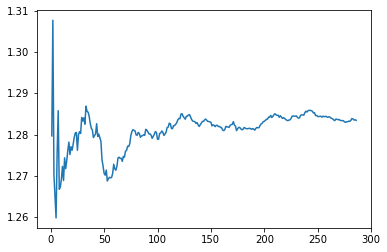

In [67]:
plt.plot([i for i in range(2000)], means_novice)

#### Non-novices

In [68]:
phrases = [df_exp.sample(frac=1).iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 2000)]

KeyboardInterrupt: 

In [ ]:
WMD_exp = [w2v_model_exp.wmdistance(phrases[i], phrases[i + 1]) for i in range(0, 4000, 2)]

In [ ]:
means_exp = [np.mean(WMD_exp[:i]) for i in range(2000)]

In [ ]:
plt.plot([i for i in range(2000)], means_exp)